In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv('Categorical.csv')
df.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [18]:
df.isnull().sum()

name         0
Longitude    0
Latitude     0
continent    0
dtype: int64

In [19]:
df.shape

(241, 4)

In [20]:
data = df.copy()

In [ ]:
data

In [21]:
label = LabelEncoder()
data['continent'] = label.fit_transform(data['continent'])
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,4
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,4
4,Albania,20.049834,41.142450,3


In [23]:
data['continent'].unique()

array([4, 2, 0, 3, 7, 5, 1, 6])

In [24]:
x = data.iloc[:, 3:4]
x

,continent
0,4
1,2
2,0
3,4
4,3
...,...
236,5
237,2
238,0
239,0


In [26]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
identify_clusters= kmeans.fit_predict(x)
identify_clusters

array([1, 2, 0, 1, 4, 4, 4, 2, 3, 2, 5, 7, 5, 6, 1, 5, 4, 2, 0, 4, 0, 0,
       2, 4, 2, 1, 1, 4, 1, 4, 1, 1, 3, 3, 1, 2, 2, 0, 0, 4, 3, 2, 0, 0,
       0, 0, 5, 3, 0, 0, 1, 1, 1, 1, 2, 2, 4, 4, 0, 1, 4, 1, 0, 3, 0, 0,
       4, 4, 0, 4, 5, 3, 4, 4, 5, 0, 4, 2, 4, 0, 0, 0, 0, 0, 4, 1, 1, 1,
       5, 3, 2, 6, 1, 4, 1, 4, 2, 4, 2, 2, 6, 4, 2, 2, 4, 2, 4, 1, 4, 2,
       2, 2, 2, 0, 2, 2, 5, 1, 2, 4, 2, 2, 2, 0, 0, 1, 4, 2, 0, 4, 4, 4,
       2, 1, 0, 4, 4, 0, 6, 1, 5, 4, 0, 4, 2, 4, 2, 5, 0, 0, 1, 6, 0, 2,
       0, 5, 0, 5, 0, 1, 5, 4, 4, 2, 5, 5, 2, 2, 1, 5, 3, 2, 5, 5, 4, 1,
       2, 4, 3, 2, 5, 2, 4, 4, 0, 0, 2, 0, 0, 0, 2, 6, 6, 5, 0, 1, 4, 0,
       0, 1, 4, 0, 3, 4, 4, 4, 0, 1, 6, 2, 1, 0, 0, 2, 2, 2, 2, 5, 1, 0,
       2, 2, 0, 0, 4, 3, 1, 2, 4, 1, 3, 1, 1, 2, 5, 5, 5, 2, 0, 0, 0])

In [28]:
data['cluster'] = identify_clusters
data.head()

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,4,1
1,Afghanistan,66.004734,33.835231,2,2
2,Angola,17.537368,-12.293361,0,0
3,Anguilla,-63.064989,18.223959,4,1
4,Albania,20.049834,41.142450,3,4


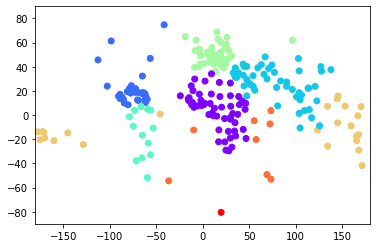

In [29]:
plt.scatter(data['Longitude'], data['Latitude'], c=data['cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()